# Дипломная работа по курсу "Аналитик данных"
        

    
## Оглавление
### [Описание данных](#description)  
### [Общая информация о данных](#task1)  
### [Подготовка датасета к анализу](#task2) 
### [EDA](#task3)  
#### [Gender](#task3.1)  
#### [Married](#task3.2)  
#### [Dependents](#task3.3)  
#### [Education](#task3.4)
#### [Self-Employed](#task3.5)
#### [Income](#task3.6)  
#### [LoanAmount](#task3.7)    
#### [Loan_Amount_Term](#task3.8)  
#### [Credit_History](#task3.9)  
#### [Property_Area](#task3.10)
#### [Tests](#task3.11)
### [Preprocessing](#task4)  
### [Model](#task5)  
### [Выводы](#task6)  

<a id='description'></a>

### Описание данных

<img src="data.JPG" width="500" height="200">

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid", palette="rocket")
import matplotlib.pyplot as plt
import scipy.stats as stat

In [92]:
import warnings
warnings.filterwarnings("ignore")

<a id='task1'></a>

### Общая информация о данных

In [93]:
df = pd.read_csv("loan_data_set.csv")

In [94]:
df.shape

(614, 13)

In [95]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**В датасете присутствуют пропуски. Оценим их количество:**

In [97]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Проверим, имеются ли дубликаты:**

In [98]:
df.duplicated().sum()

0

<a id='task2'></a>

### Подготовка датасета к анализу

**Удалим несущественные для анализа данные - Loan_ID**

In [99]:
df.drop('Loan_ID', axis=1, inplace=True)

**Заполним пропущенные значения в столбцах с категориальным типом данных значениями наиболее часто встречающимися - модой**

In [100]:
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])

**Хотя Credit_History и не является категориальной, но по сути принимает значения 1 и 0, поэтому отсутствующие значения также можно заполнить модой.**

In [101]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

**То же относится и к Loan_Amount_Term, т.к. имеет ограниченное число принимаемых значений, следовательно, также логично будет заполнить модой.**

In [102]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [103]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

**Прежде чем заполнять LoanAmount, нужно понять, имеются ли выбросы.**

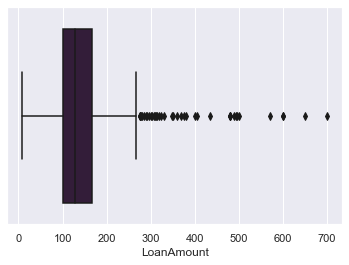

In [104]:
sns.boxplot(x="LoanAmount", data=df);

**Так как есть выбросы, заполним пустые значения медианой**

In [105]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [106]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Таким образом, пустые значения отсутствуют**

<a id='task3'></a>

### EDA

**Loan Status - целевая переменная (принимает значения Y - если кредит одобрен и N если отклонен)**

In [107]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

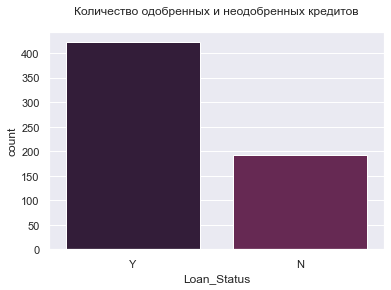

In [108]:
sns.countplot(df["Loan_Status"]).set_title("Количество одобренных и неодобренных кредитов\n");

In [109]:
pd.DataFrame(df["Loan_Status"].value_counts(normalize=True))

,Loan_Status
Y,0.687296
N,0.312704


**Одобрено около 69% кредитов**

Для расчета рейтинга успешности получения кредита добавим еще один признак - перекодируем Loan_Status в значения 1 и 0.

In [110]:
df['Loan_Status_bin'] = df['Loan_Status'].replace({'N':0, 'Y':1})

<a id='task3.1'></a>

**Gender (Male/Female)**

**Оценим влияние признака Gender на целевую переменную**

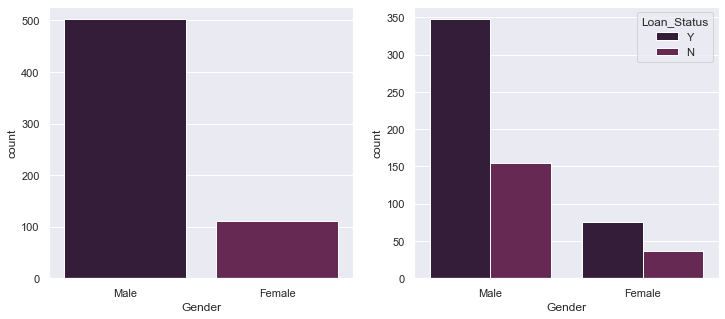

In [111]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(df["Gender"], ax=ax[0])
sns.countplot(df["Gender"], hue=df["Loan_Status"], ax=ax[1]);

In [112]:
pd.DataFrame(round(df['Gender'].value_counts(normalize=True)*100))

,Gender
Male,82.0
Female,18.0


In [113]:
df.groupby(['Gender'])[['Loan_Status_bin']].agg(['count','mean'])

Loan_Status_bin          
                 count      mean
Gender                          
Female             112  0.669643
Male               502  0.691235

In [114]:
pd.DataFrame(df.groupby(by="Gender")["Loan_Status"].value_counts())

Loan_Status
Gender Loan_Status             
Female Y                     75
       N                     37
Male   Y                    347
       N                    155

**Выводы:**  
1. 502 заявителя - 82% являются мужчинами и 112 - 18% женщинами
2. 75 женщин - 67%  и 347 мужчин - 69%  получили кредит
3. Разница составляет всего 2%, что говорит о том, что влияние данного фактора на целевую переменную незначительно.

<a id='task3.2'></a>

**Married (No/Yes)**

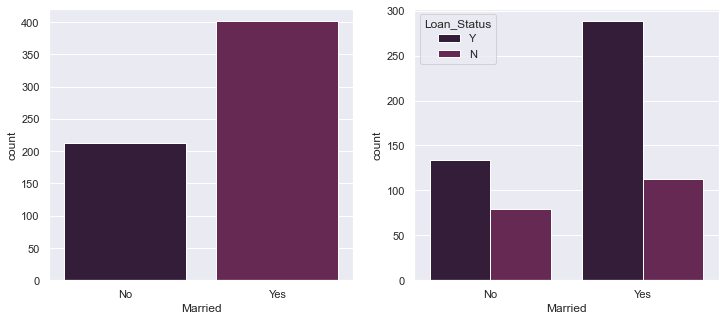

In [115]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(df['Married'], ax=ax[0])
sns.countplot(df['Married'], hue=df['Loan_Status'], ax=ax[1]);

In [116]:
pd.DataFrame(round(df['Married'].value_counts(normalize=True)*100))

,Married
Yes,65.0
No,35.0


In [117]:
df.groupby(['Married'])[['Loan_Status_bin']].agg(['count','mean'])

Loan_Status_bin          
                  count      mean
Married                          
No                  213  0.629108
Yes                 401  0.718204

In [118]:
pd.DataFrame(df.groupby(by="Married")["Loan_Status"].value_counts())

Loan_Status
Married Loan_Status             
No      Y                    134
        N                     79
Yes     Y                    288
        N                    113

**Выводы:**  
1. 401 заявитель - 65% в браке и 213 - 35% не в браке
2. 288 заявителей в браке - 72%  и 134 заявителя вне брака - 63%  получили кредит
3. Разница составляет уже 9%, что говорит о том, что влияние данного фактора на целевую переменную выше чем у предыдущего, т.е. шанс получить кредит на 9% выше если заявитель в браке.

<a id='task3.3'></a>

**Dependents (Иждивенцы - 0,1,2 или 3+)**

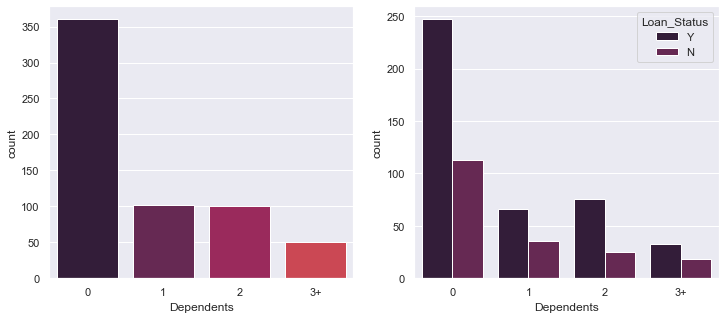

In [119]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(df['Dependents'], ax=ax[0])
sns.countplot(df['Dependents'], hue=df['Loan_Status'], ax=ax[1]);

In [120]:
pd.DataFrame(round(df['Dependents'].value_counts(normalize=True)*100))

,Dependents
0,59.0
1,17.0
2,16.0
3+,8.0


In [121]:
df.groupby(['Dependents'])[['Loan_Status_bin']].agg(['count','mean'])

Loan_Status_bin          
                     count      mean
Dependents                          
0                      360  0.686111
1                      102  0.647059
2                      101  0.752475
3+                      51  0.647059

In [122]:
pd.DataFrame(df.groupby(['Dependents'])['Loan_Status'].value_counts())

Loan_Status
Dependents Loan_Status             
0          Y                    247
           N                    113
1          Y                     66
           N                     36
2          Y                     76
           N                     25
3+         Y                     33
           N                     18

In [123]:
pd.DataFrame(df.groupby(['Dependents'])['Married'].value_counts(normalize=True))

Married
Dependents Married          
0          Yes      0.513889
           No       0.486111
1          Yes      0.774510
           No       0.225490
2          Yes      0.920792
           No       0.079208
3+         Yes      0.862745
           No       0.137255

**Выводы:**  
1. 360 заявителей - 59% не имеют иждивенцев, 102 - 17% - один, 101 - 16% - два и 51 - 8% три и более.
2. 247 чел. без иждивенцев - 68%, 66 чел. с 1 - 65%, 76 чел с двумя иждивенцами - 75% и 33 чел. с 3+ - 65% получили кредит.
3. Здесь можно заметить, что в группе людей с двумя иждивенцами % успешности получения кредитов составляет 75%, что в среднем на 10% выше, чем в других группах, но это влияние другого фактора, рассмотренного выше - статус брака. Так, в категории заявителей с двумя иждивенцами самый высокий % состоящих в браке - 92% по сравнению с другими группами (51%,77% и 86%).
4. Сам по себе данный фактор не существенно влияет на целевую переменную.

<a id='task3.4'></a>

**Education - (Graduate/Not Graduate)**

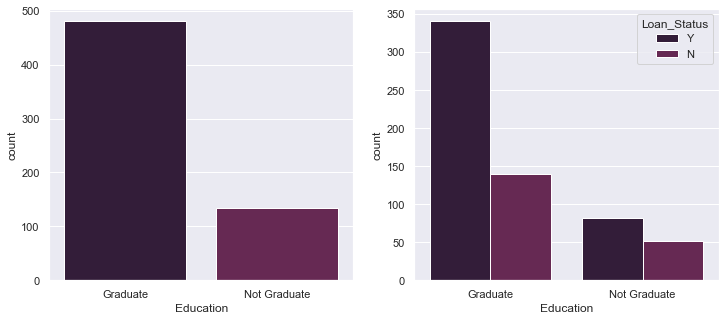

In [124]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(df['Education'], ax=ax[0])
sns.countplot(df['Education'], hue=df['Loan_Status'], ax=ax[1]);

In [125]:
pd.DataFrame(round(df['Education'].value_counts(normalize=True)*100))

,Education
Graduate,78.0
Not Graduate,22.0


In [126]:
df.groupby(['Education'])[['Loan_Status_bin']].agg(['count','mean'])

Loan_Status_bin          
                       count      mean
Education                             
Graduate                 480  0.708333
Not Graduate             134  0.611940

In [127]:
pd.DataFrame(df.groupby(['Education'])["Loan_Status"].value_counts())

Loan_Status
Education    Loan_Status             
Graduate     Y                    340
             N                    140
Not Graduate Y                     82
             N                     52

**Выводы:**  
1. 480 заявителей - 78% имеют высшее образование и 134 - 22% нет
2. 340 заявителей с образованием - 71%  и 82 заявителя без - 61%  получили кредит
3. Разница составляет 10%, что говорит о том, что имеется небольшое влияние данного фактора на целевую переменную, т.е. шанс получить кредит на 10% выше если заявитель имеет высшее образование.

<a id='task3.5'></a>

**Self Employed (No/Yes)**

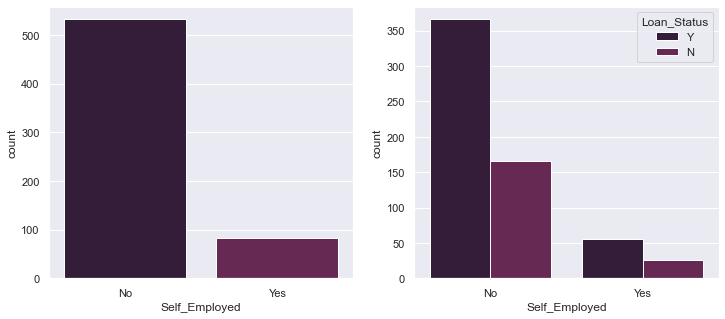

In [128]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(df['Self_Employed'], ax=ax[0])
sns.countplot(df['Self_Employed'], hue=df['Loan_Status'], ax=ax[1]);

In [129]:
pd.DataFrame(round(df['Self_Employed'].value_counts(normalize=True)*100))

,Self_Employed
No,87.0
Yes,13.0


In [130]:
df.groupby(['Self_Employed'])[['Loan_Status_bin']].agg(['count','mean'])

Loan_Status_bin          
                        count      mean
Self_Employed                          
No                        532  0.687970
Yes                        82  0.682927

In [131]:
pd.DataFrame(df.groupby(['Self_Employed'])["Loan_Status"].value_counts())

Loan_Status
Self_Employed Loan_Status             
No            Y                    366
              N                    166
Yes           Y                     56
              N                     26

**Выводы:**  
1. 532 заявителя - 87% не являются самозанятыми и только 82 чел. - 13% являются.
2. 366 чел., не являющихся самозанятыми - 69%  и 56 заявителей, являющихся - 68%  получили кредит.
3. Разница составляет менее 1%, что говорит о том, что этот фактор не влияет на целевую переменную.

<a id='task3.6'></a>

**Applicant Income**

In [132]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

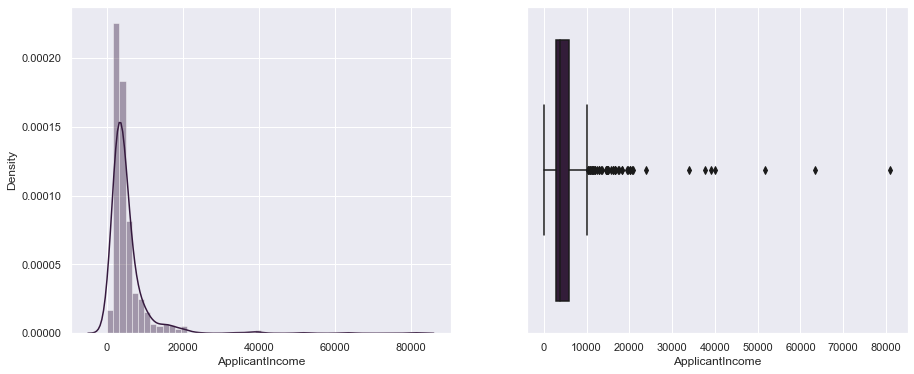

In [133]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.distplot(df['ApplicantIncome'], bins=50, ax=ax[0])
sns.boxplot(df['ApplicantIncome'], ax=ax[1]);

**Распределение не является нормальным и присутствуют выбросы, т.е при подготовке данных к моделированию нужно будет преобразовать данные с помощью логарифмирования и удалить выбросы**

**Для изучения влияния этого признака на целевую переменную сгруппируем значения ApplicantIncome**

In [134]:
df['ApplicantIncome_group'] = pd.cut(df['ApplicantIncome'],[0, 2900, 3900, 5800, 100000])

In [135]:
df.groupby('ApplicantIncome_group')['Loan_Status_bin'].agg(['count','mean'])

,count,mean
ApplicantIncome_group,,
"(0, 2900]",159,0.691824
"(2900, 3900]",162,0.697531
"(3900, 5800]",140,0.678571
"(5800, 100000]",153,0.679739


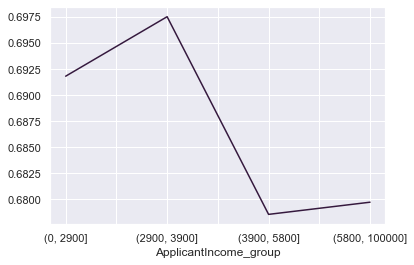

In [136]:
df.groupby('ApplicantIncome_group')['Loan_Status_bin'].mean().plot(grid=True);

**Выводы:**  
Какой-то значимой зависимости целевой переменной от показателя ApplicantIncome не наблюдается.

**Co-applicant Income**

In [137]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

<AxesSubplot:xlabel='CoapplicantIncome'>

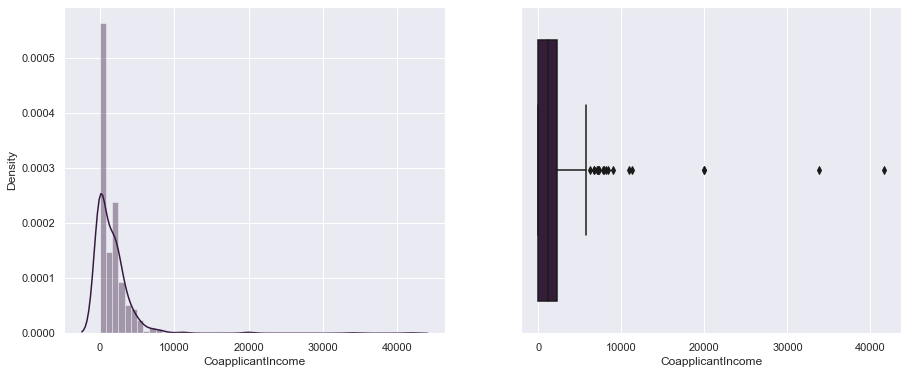

In [138]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.distplot(df['CoapplicantIncome'], bins=50, ax=ax[0])
sns.boxplot(df['CoapplicantIncome'], ax=ax[1])

**Распределение не является нормальным и присутствуют выбросы, т.е при подготовке данных к моделированию нужно будет преобразовать данные с помощью логарифмирования и удалить выбросы**

**Для изучения влияния этого признака на целевую переменную сгруппируем значения CoapplicantIncome**

In [139]:
df['CoapplicantIncome_group'] = pd.cut(df['CoapplicantIncome'],[-0.0001, 1200.000, 2300.000, 42000.000])

In [140]:
df.groupby('CoapplicantIncome_group')['Loan_Status_bin'].agg(['count','mean'])

,count,mean
CoapplicantIncome_group,,
"(-0.0001, 1200.0]",307,0.677524
"(1200.0, 2300.0]",153,0.705882
"(2300.0, 42000.0]",154,0.688312


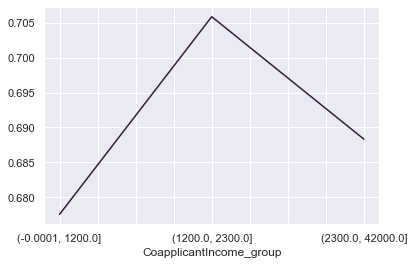

In [141]:
df.groupby('CoapplicantIncome_group')['Loan_Status_bin'].mean().plot(grid=True);

**Выводы:**  
Какой-то значимой зависимости целевой переменной от показателя CoapplicantIncome не наблюдается.

<a id='task3.7'></a>

**Loan Amount**

In [142]:
df["LoanAmount"].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

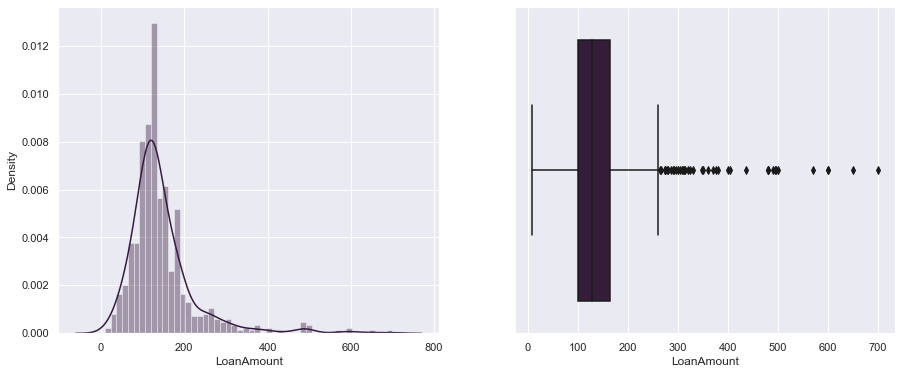

In [143]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.distplot(df['LoanAmount'], bins=50, ax=ax[0])
sns.boxplot(df['LoanAmount'], ax=ax[1]);

**Распределение не является нормальным и присутствуют выбросы, т.е при подготовке данных к моделированию нужно будет преобразовать данные с помощью логарифмирования и удалить выбросы**

**Для изучения влияния этого признака на целевую переменную сгруппируем значения LoanAmount**

In [144]:
df['LoanAmount_group'] = pd.cut(df['LoanAmount'],[9, 100, 130, 165, 700])

In [145]:
df.groupby('LoanAmount_group')['Loan_Status_bin'].agg(['count','mean'])

,count,mean
LoanAmount_group,,
"(9, 100]",153,0.699346
"(100, 130]",186,0.704301
"(130, 165]",123,0.699187
"(165, 700]",151,0.649007


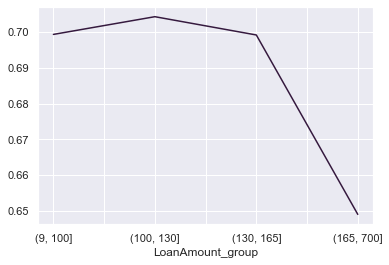

In [146]:
df.groupby('LoanAmount_group')['Loan_Status_bin'].mean().plot(grid=True);

**Выводы:**  
При запрашиваемых суммах выше 165 тыс.долл, кредит получили 65% заявителей, тогда как при суммах меньше 165 тыс. долл - около 70%, т.е шанс получить кредит на 5% выше если запрашиваемая сумма меньше 165 тыс.долл.

<a id='task3.8'></a>

**Loan Amount Term**

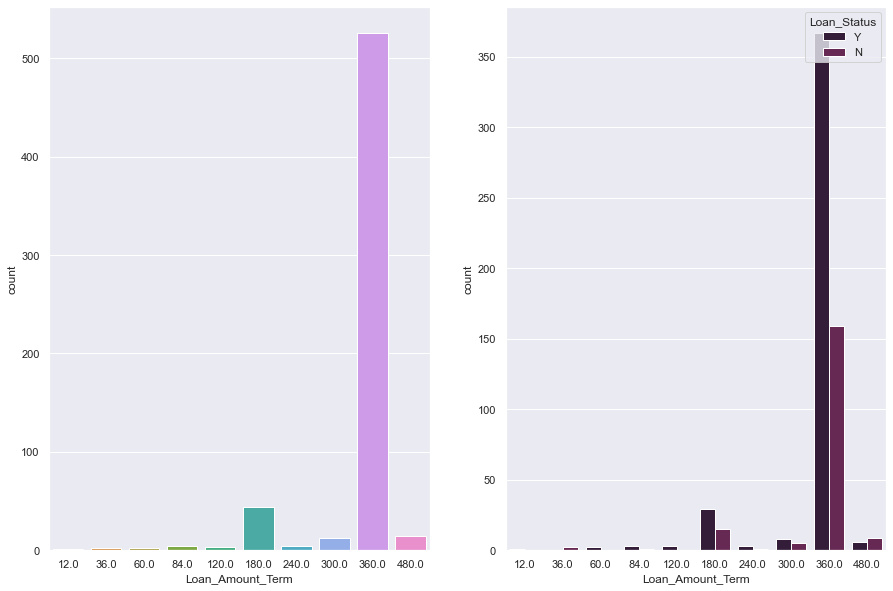

In [147]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
sns.countplot(df['Loan_Amount_Term'], ax=ax[0])
sns.countplot(df['Loan_Amount_Term'], hue=df['Loan_Status'], ax=ax[1]);

In [148]:
pd.DataFrame(df['Loan_Amount_Term'].value_counts())

,Loan_Amount_Term
360.0,526
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
36.0,2
60.0,2
12.0,1


**Для изучения влияния этого признака на целевую переменную сгруппируем значения Loan_Amount_Term, в три группы по принципу - до медианы, медианное значение и от медианы до максимума**

In [149]:
df['Loan_Amount_Term_group'] = pd.cut(df['Loan_Amount_Term'],[0, 350, 370, 480])

In [150]:
df.groupby('Loan_Amount_Term_group')['Loan_Status_bin'].agg(['count','mean'])

,count,mean
Loan_Amount_Term_group,,
"(0, 350]",73,0.671233
"(350, 370]",526,0.697719
"(370, 480]",15,0.400000


In [151]:
df.groupby(['Loan_Amount_Term_group'])[['Loan_Status_bin']].agg(['count','mean'])

Loan_Status_bin          
                                 count      mean
Loan_Amount_Term_group                          
(0, 350]                            73  0.671233
(350, 370]                         526  0.697719
(370, 480]                          15  0.400000

In [152]:
pd.DataFrame(df.groupby(['Loan_Amount_Term_group'])['Loan_Status'].value_counts())

Loan_Status
Loan_Amount_Term_group Loan_Status             
(0, 350]               Y                     49
                       N                     24
(350, 370]             Y                    367
                       N                    159
(370, 480]             N                      9
                       Y                      6

**Выводы:**  
1. При сроках до 360 месяцев включительно кредит получили 67% - 49 заявителей, при сроке в 360 мес.кредит получили 70% заявителей - 367 чел. и при сроке в 480 мес.кредит получили только 40% заявителей - 6 чел.
3. Таким образом, при запрашиваемом сроке до 360 мес. включительно шанс получить кредит выше на 30%.

<a id='task3.9'></a>

**Credit History (1-есть, 0-нет)**


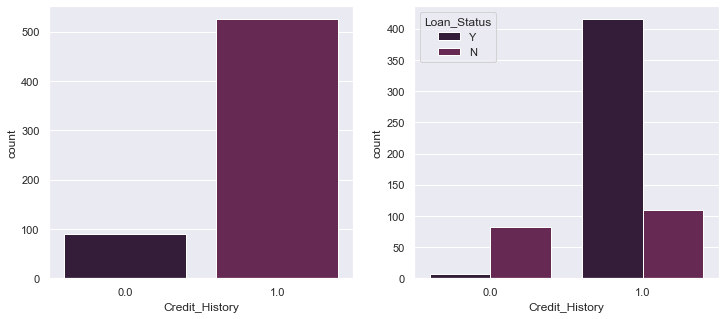

In [153]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(df['Credit_History'], ax=ax[0])
sns.countplot(df['Credit_History'], hue=df['Loan_Status'], ax=ax[1]);

In [154]:
pd.DataFrame(round(df['Credit_History'].value_counts(normalize=True)*100))

,Credit_History
1.0,86.0
0.0,14.0


In [155]:
df.groupby(['Credit_History'])[['Loan_Status_bin']].agg(['count','mean'])

Loan_Status_bin          
                         count      mean
Credit_History                          
0.0                         89  0.078652
1.0                        525  0.790476

In [156]:
pd.DataFrame(df.groupby(['Credit_History'])['Loan_Status'].value_counts())

Loan_Status
Credit_History Loan_Status             
0.0            N                     82
               Y                      7
1.0            Y                    415
               N                    110

**Выводы:**  
1. 525 заявителей - 86% имеют кредитную историю и 89 - 14% нет.
2. 415 заявителей с кредитной историей - 79%  и 7 заявитей без кредитной истории - 8%  получили кредит.
3. Разница составляет 71%, что говорит о том, что влияние данного фактора на целевую переменную огромно, т.е. шанс получить кредит на 71% выше если заявитель имеет подходящую кредитную историю.

<a id='task3.10'></a>

**Property Area**

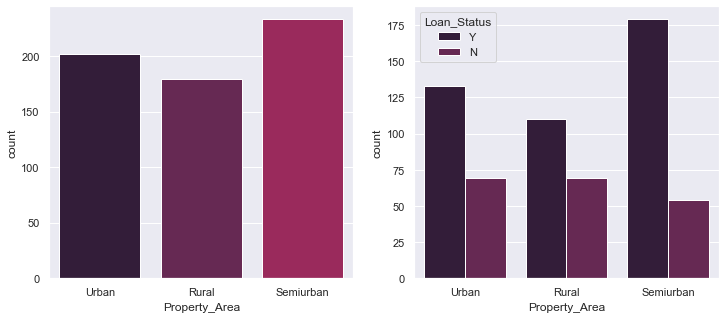

In [157]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(df['Property_Area'], ax=ax[0])
sns.countplot(df['Property_Area'], hue=df['Loan_Status'], ax=ax[1]);

In [158]:
pd.DataFrame(round(df['Property_Area'].value_counts(normalize=True)*100))

,Property_Area
Semiurban,38.0
Urban,33.0
Rural,29.0


In [159]:
df.groupby(['Property_Area'])[['Loan_Status_bin']].agg(['count','mean'])

Loan_Status_bin          
                        count      mean
Property_Area                          
Rural                     179  0.614525
Semiurban                 233  0.768240
Urban                     202  0.658416

In [160]:
pd.DataFrame(df.groupby('Property_Area')["Loan_Status"].value_counts())

Loan_Status
Property_Area Loan_Status             
Rural         Y                    110
              N                     69
Semiurban     Y                    179
              N                     54
Urban         Y                    133
              N                     69

**Выводы:**  
1. 233 заявителя имеют жилье в пригородных районах  - 38%, 202 в городских - 33% и 179 - 329% в сельских.
2. 179 заявителей с жильем в пригородных районах - 77%, 133 в городских - 66% и 110 в сельских - 61%  получили кредит.
3. Разница между категориями составляет до 16%, что говорит о том, что имеется влияние данного фактора на целевую переменную, т.е. шанс получить кредит на 16% выше если у заявителя жилье в пригородном районе.

<a id='task3.11'></a>

### Тесты

**Посмотрим на одной картинке, как связаны между собой различные признаки в наборе данных**

In [161]:
df_ready = df.drop(['Loan_Status','ApplicantIncome_group','CoapplicantIncome_group', 'LoanAmount_group','Loan_Amount_Term_group'], axis=1 )

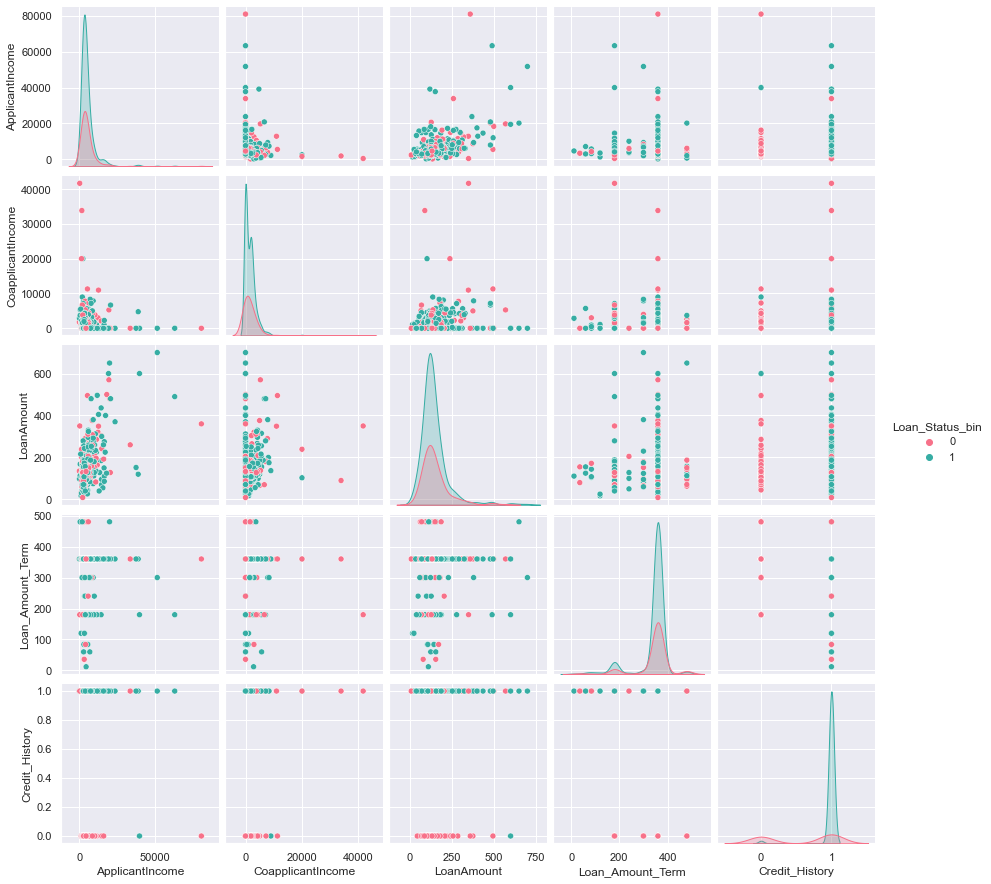

In [162]:
sns.pairplot(df_ready, hue = 'Loan_Status_bin', palette='husl');

**Теперь посмотрим, с какими признаками коррелирует целевая переменная, для этого перекодируем категориальные признаки**

In [163]:
def object_col(df):
    return [x for x in df.columns if df[x].dtype == "object"]

def one_hot_encoding(df, columns):
    return pd.get_dummies(df, columns=columns)

cat_cols = object_col(df_ready)
df_encod = one_hot_encoding(df_ready, cat_cols)

In [164]:
df_ready.Gender.replace({'Male': 1, 'Female': 0}, inplace = True)
df_ready.Married.replace({'Yes': 1, 'No': 0}, inplace = True)
df_ready.Education.replace({'Graduate': 1, 'Not Graduate': 0}, inplace = True)
df_ready.Self_Employed.replace({'Yes': 1, 'No': 0}, inplace = True)
df_ready.Dependents.replace({'0':0,'1':1,'2':2,'3+':3}, inplace = True)
df_ready.Property_Area.replace({'Urban':2,'Rural':0,'Semiurban':1}, inplace = True)

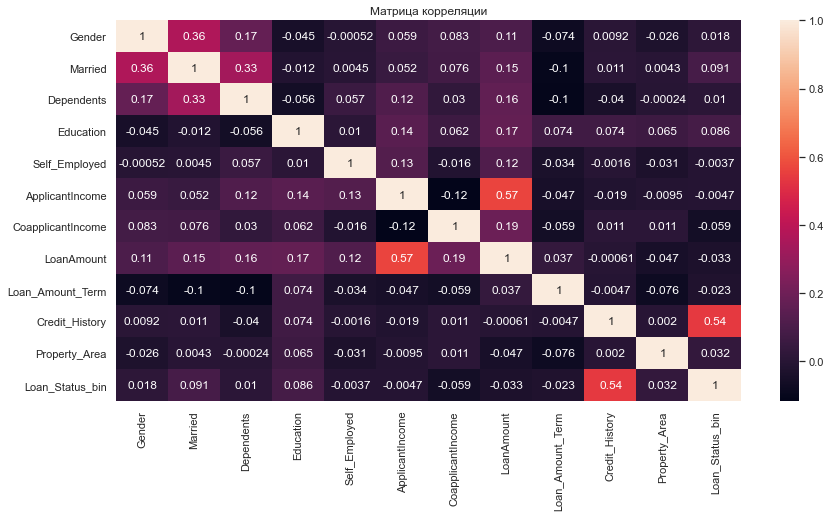

In [165]:
plt.figure(figsize=(14,7))
sns.heatmap(df_ready.corr(),annot=True)
plt.title('Матрица корреляции');

**Видно, что имеется корреляция между суммой кредита и величиной дохода заявителя**

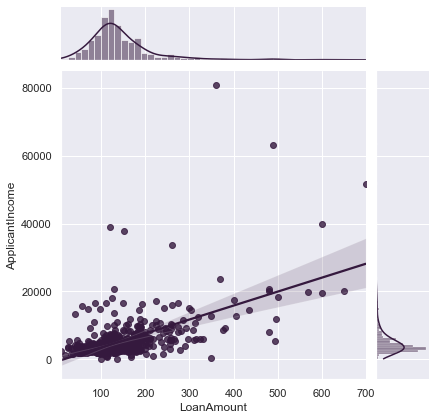

In [166]:
sns.jointplot(df_ready['LoanAmount'], df_ready_encod['ApplicantIncome'], kind="reg");

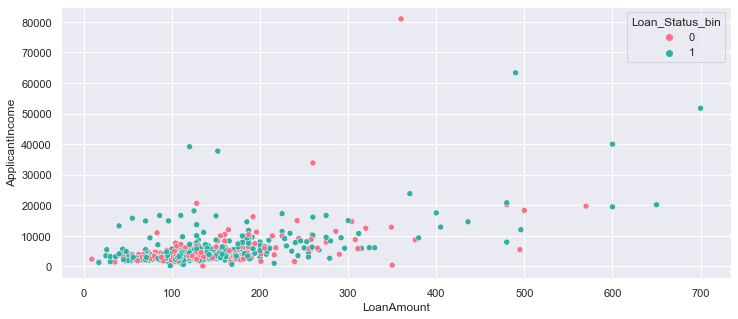

In [167]:
plt.figure(figsize=(12,5))
sns.scatterplot(df_ready['LoanAmount'], df_ready['ApplicantIncome'], hue=df_ready['Loan_Status_bin'], palette='husl'); 

**Из вышеприведенных графиков следует:**
1. Заявителю, просящему большую сумму кредита, но имеющему низкий доход, будет трудно получить кредит, например, (250, 35000) и (350, 80000).
2. Заявитель, запрашивающий небольшую сумму кредита, но имеющий сравнительно высокий доход, легко получит кредит, например, (120, 40000) и (150, 39000)
3. Взаимосвязь между показателями представляет собой практически прямую линию.

<a id='task4'></a>

### Preprocessing

<a id='task5'></a>

### Model

<a id='task6'></a>

### Выводы